# Contant

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:\\batchs\\2023\\cvs .file\\customerchurn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.drop("customerID",axis=1,inplace = True)

In [9]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [11]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
df["TotalCharges"].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [13]:
df1 = df.copy()

In [14]:
df1.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [15]:
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [16]:
df1["TotalCharges"]= pd.to_numeric(df["TotalCharges"], errors= "coerce")

In [17]:
pd.to_numeric(df1["TotalCharges"],errors="coerce")[488]

nan

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [19]:
df1.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [20]:
df1.dropna(inplace = True)

In [21]:
df1.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [22]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:
df1["gender"].unique()

array(['Female', 'Male'], dtype=object)

In [24]:
for i in df1:
    print(i,":",df1[i].unique())

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78

In [25]:
df1.replace("No phone service",'No', inplace = True)

In [26]:
df1.replace("No internet service",'No', inplace = True)

In [27]:
for i in df1:
    print(i,":",df1[i].unique())

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : ['No' 'Yes']


In [28]:
df1.replace({'Yes':1, 'No':0,'Female':0,'Male':1},inplace = True)

In [29]:
for i in df1:
    print(i,":",df1[i].unique())

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 0]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [30]:
final = pd.get_dummies(data=df1,drop_first=True)

In [31]:
final.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,1,0,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,1,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,0,1,0,0,0,1,0


In [32]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   int64  
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   tenure                                 7032 non-null   int64  
 5   PhoneService                           7032 non-null   int64  
 6   MultipleLines                          7032 non-null   int64  
 7   OnlineSecurity                         7032 non-null   int64  
 8   OnlineBackup                           7032 non-null   int64  
 9   DeviceProtection                       7032 non-null   int64  
 10  TechSupport                            7032 non-null   int64  
 11  Stre

In [33]:
tenur0 = final[final["Churn"]==0].tenure

In [34]:
tenur0

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

In [35]:
tenur1 = final[final["Churn"]==1].tenure

In [36]:
tenur1

2        2
4        2
5        8
8       28
13      49
        ..
7021    12
7026     9
7032     1
7034    67
7041     4
Name: tenure, Length: 1869, dtype: int64

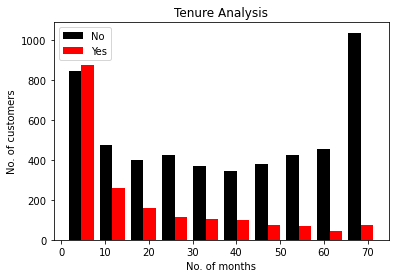

In [37]:
plt.hist([tenur0,tenur1], color =["black","red"],label=["No","Yes"])
plt.xlabel('No. of months')
plt.ylabel('No. of customers')
plt.legend()
plt.title("Tenure Analysis")
plt.show()

In [38]:
monthlycharges0 = final[final["Churn"]== 0].MonthlyCharges
monthlycharges1 = final[final["Churn"]== 1].MonthlyCharges

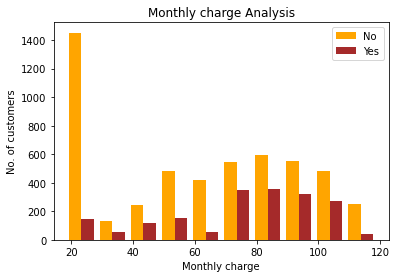

In [39]:
plt.hist([monthlycharges0,monthlycharges1], color =["orange","brown"],label=["No","Yes"])
plt.xlabel('Monthly charge')
plt.ylabel('No. of customers')
plt.legend()
plt.title("Monthly charge Analysis")
plt.show()

In [40]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   int64  
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   tenure                                 7032 non-null   int64  
 5   PhoneService                           7032 non-null   int64  
 6   MultipleLines                          7032 non-null   int64  
 7   OnlineSecurity                         7032 non-null   int64  
 8   OnlineBackup                           7032 non-null   int64  
 9   DeviceProtection                       7032 non-null   int64  
 10  TechSupport                            7032 non-null   int64  
 11  Stre

In [41]:
X = final.drop("Churn",axis=1)

In [42]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,29.85,29.85,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,0,56.95,1889.50,1,0,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,53.85,108.15,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,0,42.30,1840.75,1,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,1,70.70,151.65,0,1,0,0,0,1,0


In [43]:
y = final.Churn

In [44]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler = MinMaxScaler()

In [47]:
scaled = scaler.fit_transform(X)

In [48]:
scaled

array([[0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 1., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [49]:
scaled.shape

(7032, 23)

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [52]:
X_train.shape

(5625, 23)

In [53]:
X_test.shape

(1407, 23)

In [54]:
model = keras.Sequential([
    keras.layers.Dense(1,input_shape = (23,),activation = "sigmoid")
])

In [55]:
model.compile(optimizer='adam', loss ='binary_crossentropy',metrics= ['Accuracy'] )

In [56]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
176/176 [==============================] - 2s 5ms/step - loss: 130.0968 - Accuracy: 0.7444
Epoch 2/10
176/176 [==============================] - 0s 3ms/step - loss: 64.2670 - Accuracy: 0.7524
Epoch 3/10
176/176 [==============================] - 1s 3ms/step - loss: 14.1577 - Accuracy: 0.6450
Epoch 4/10
176/176 [==============================] - 0s 2ms/step - loss: 6.2865 - Accuracy: 0.5886
Epoch 5/10
176/176 [==============================] - 0s 2ms/step - loss: 4.0814 - Accuracy: 0.6053
Epoch 6/10
176/176 [==============================] - 0s 3ms/step - loss: 2.0736 - Accuracy: 0.6428
Epoch 7/10
176/176 [==============================] - 1s 7ms/step - loss: 0.7073 - Accuracy: 0.7323
Epoch 8/10
176/176 [==============================] - 1s 8ms/step - loss: 0.4876 - Accuracy: 0.7796
Epoch 9/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4758 - Accuracy: 0.7842
Epoch 10/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4891 - Accuracy: 0.

In [57]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4922 - Accuracy: 0.7776
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4665 - Accuracy: 0.7861
Epoch 3/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4575 - Accuracy: 0.7845
Epoch 4/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4541 - Accuracy: 0.7881
Epoch 5/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4904 - Accuracy: 0.7771
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4573 - Accuracy: 0.7870
Epoch 7/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4829 - Accuracy: 0.7829
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4695 - Accuracy: 0.7787
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4572 - Accuracy: 0.7879
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4580 - Accura

176/176 [==============================] - 0s 2ms/step - loss: 0.4495 - Accuracy: 0.7959
Epoch 82/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4469 - Accuracy: 0.7945
Epoch 83/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4385 - Accuracy: 0.7959
Epoch 84/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4522 - Accuracy: 0.7977
Epoch 85/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4542 - Accuracy: 0.7945
Epoch 86/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4427 - Accuracy: 0.7973
Epoch 87/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4739 - Accuracy: 0.7900
Epoch 88/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4549 - Accuracy: 0.7940
Epoch 89/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4454 - Accuracy: 0.7938
Epoch 90/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4394 - Accuracy: 

In [58]:
model = keras.Sequential([
    keras.layers.Dense(50,input_shape = (23,),activation= "relu",kernel_initializer = 'ones',bias_initializer ="zeros"),
    keras.layers.Dense(1,activation = "sigmoid")
])

In [59]:
model.compile(optimizer='adam', loss ='binary_crossentropy',metrics= ['Accuracy'] )

In [60]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 2s 2ms/step - loss: 301.5753 - Accuracy: 0.6233
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 5.0641 - Accuracy: 0.7051
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 6.5350 - Accuracy: 0.7056
Epoch 4/100
176/176 [==============================] - 0s 3ms/step - loss: 4.1768 - Accuracy: 0.7364
Epoch 5/100
176/176 [==============================] - 0s 3ms/step - loss: 4.1370 - Accuracy: 0.7356
Epoch 6/100
176/176 [==============================] - 0s 3ms/step - loss: 6.8842 - Accuracy: 0.7220
Epoch 7/100
176/176 [==============================] - 0s 3ms/step - loss: 5.7581 - Accuracy: 0.7330
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 6.2369 - Accuracy: 0.7257
Epoch 9/100
176/176 [==============================] - 0s 3ms/step - loss: 6.1203 - Accuracy: 0.7372
Epoch 10/100
176/176 [==============================] - 0s 3ms/step - loss: 4.2548 - Accu

176/176 [==============================] - 0s 2ms/step - loss: 4.9733 - Accuracy: 0.7479
Epoch 82/100
176/176 [==============================] - 0s 2ms/step - loss: 5.1847 - Accuracy: 0.7424
Epoch 83/100
176/176 [==============================] - 0s 2ms/step - loss: 3.7848 - Accuracy: 0.7575
Epoch 84/100
176/176 [==============================] - 0s 2ms/step - loss: 4.4808 - Accuracy: 0.7399
Epoch 85/100
176/176 [==============================] - 0s 2ms/step - loss: 6.1217 - Accuracy: 0.7351
Epoch 86/100
176/176 [==============================] - 0s 2ms/step - loss: 4.6393 - Accuracy: 0.7476
Epoch 87/100
176/176 [==============================] - 0s 2ms/step - loss: 6.6965 - Accuracy: 0.7403
Epoch 88/100
176/176 [==============================] - 0s 2ms/step - loss: 4.1258 - Accuracy: 0.7467
Epoch 89/100
176/176 [==============================] - 0s 2ms/step - loss: 2.8619 - Accuracy: 0.7634
Epoch 90/100
176/176 [==============================] - 0s 2ms/step - loss: 3.5780 - Accuracy: 

In [61]:
model.fit(X_train,y_train,epochs=150)

Epoch 1/150
176/176 [==============================] - 0s 3ms/step - loss: 5.4532 - Accuracy: 0.7484
Epoch 2/150
176/176 [==============================] - 0s 3ms/step - loss: 5.2544 - Accuracy: 0.7470
Epoch 3/150
176/176 [==============================] - 1s 3ms/step - loss: 5.5292 - Accuracy: 0.7413
Epoch 4/150
176/176 [==============================] - 1s 3ms/step - loss: 5.6901 - Accuracy: 0.7520
Epoch 5/150
176/176 [==============================] - 1s 3ms/step - loss: 4.2151 - Accuracy: 0.7538
Epoch 6/150
176/176 [==============================] - 1s 3ms/step - loss: 3.3242 - Accuracy: 0.7604
Epoch 7/150
176/176 [==============================] - 0s 3ms/step - loss: 4.9889 - Accuracy: 0.7387
Epoch 8/150
176/176 [==============================] - 1s 3ms/step - loss: 3.3096 - Accuracy: 0.7582
Epoch 9/150
176/176 [==============================] - 0s 3ms/step - loss: 4.0033 - Accuracy: 0.7429
Epoch 10/150
176/176 [==============================] - 0s 3ms/step - loss: 4.0766 - Accura

176/176 [==============================] - 0s 3ms/step - loss: 4.8478 - Accuracy: 0.7463
Epoch 82/150
176/176 [==============================] - 0s 3ms/step - loss: 2.8477 - Accuracy: 0.7612
Epoch 83/150
176/176 [==============================] - 1s 3ms/step - loss: 3.7390 - Accuracy: 0.7490
Epoch 84/150
176/176 [==============================] - 0s 3ms/step - loss: 4.3722 - Accuracy: 0.7474
Epoch 85/150
176/176 [==============================] - 1s 3ms/step - loss: 5.5753 - Accuracy: 0.7353
Epoch 86/150
176/176 [==============================] - 1s 4ms/step - loss: 4.6108 - Accuracy: 0.7415
Epoch 87/150
176/176 [==============================] - 1s 4ms/step - loss: 6.0850 - Accuracy: 0.7422
Epoch 88/150
176/176 [==============================] - 1s 4ms/step - loss: 6.1249 - Accuracy: 0.7275
Epoch 89/150
176/176 [==============================] - 1s 3ms/step - loss: 4.1390 - Accuracy: 0.7495
Epoch 90/150
176/176 [==============================] - 0s 3ms/step - loss: 4.9375 - Accuracy: 

In [62]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 3ms/step - loss: 1.9765 - Accuracy: 0.7775


[1.97653329372406, 0.7775408625602722]

In [63]:
predicted = model.predict(X_test)

44/44 [==============================] - 0s 2ms/step


In [64]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=predicted)

In [65]:
import seaborn as sns

<AxesSubplot:>

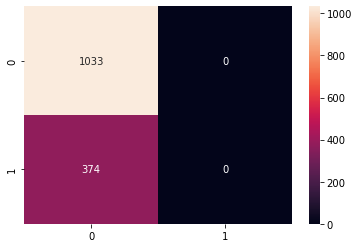

In [66]:
sns.heatmap(cm,annot = True, fmt = "d")

In [67]:
final.shape

(7032, 24)

In [68]:
final["Churn"]

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [69]:
final["Churn"].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [70]:
df0 = final[final["Churn"]==0]
df0

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,1,0,1,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,1,0,1,0,0,0,0
6,1,0,0,1,22,1,1,0,1,0,...,89.10,1949.40,0,0,1,0,0,1,0,0
7,0,0,0,0,10,0,0,1,0,0,...,29.75,301.90,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0,0,0,0,72,1,0,0,0,0,...,21.15,1419.40,0,0,0,0,1,0,0,0
7038,1,0,1,1,24,1,1,1,0,1,...,84.80,1990.50,0,1,0,1,0,0,0,1
7039,0,0,1,1,72,1,1,0,1,1,...,103.20,7362.90,0,0,1,1,0,1,0,0
7040,0,0,1,1,11,0,0,1,0,0,...,29.60,346.45,0,1,0,0,0,0,1,0


In [71]:
df0.shape

(5163, 24)

In [72]:
df1 = final[final["Churn"]==1]
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,1,0,0,0,0,0,1
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,0,1,0,0,0,1,0
5,0,0,0,0,8,1,1,0,0,1,...,99.65,820.50,1,0,1,0,0,0,1,0
8,0,0,1,0,28,1,1,0,0,1,...,104.80,3046.05,1,0,1,0,0,0,1,0
13,1,0,0,0,49,1,1,0,1,1,...,103.70,5036.30,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1,0,0,0,12,1,0,0,0,0,...,59.80,727.80,1,1,0,1,0,0,1,0
7026,0,0,0,0,9,1,0,0,0,0,...,44.20,403.35,1,1,0,0,0,0,0,0
7032,1,1,0,0,1,1,1,0,0,0,...,75.75,75.75,1,0,1,0,0,0,1,0
7034,0,0,0,0,67,1,1,1,1,1,...,102.95,6886.25,1,0,1,0,0,1,0,0


In [73]:
df1.shape

(1869, 24)

In [74]:
df0_undersample = df0.sample(1869)

In [75]:
df0_undersample.shape

(1869, 24)

In [76]:
undersample = pd.concat([df1,df0_undersample])

In [77]:
undersample.shape

(3738, 24)

In [78]:
undersample.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,1,0,0,0,0,0,1
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,0,1,0,0,0,1,0
5,0,0,0,0,8,1,1,0,0,1,...,99.65,820.50,1,0,1,0,0,0,1,0
8,0,0,1,0,28,1,1,0,0,1,...,104.80,3046.05,1,0,1,0,0,0,1,0
13,1,0,0,0,49,1,1,0,1,1,...,103.70,5036.30,1,0,1,0,0,0,0,0


In [79]:
col_scale = undersample[['tenure','MonthlyCharges','TotalCharges']]

In [80]:
undersample[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(col_scale)

In [81]:
undersample.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2,1,0,0,0,0.014085,1,0,1,1,0,...,0.354758,0.010305,1,1,0,0,0,0,0,1
4,0,0,0,0,0.014085,1,0,0,0,0,...,0.522671,0.015324,1,0,1,0,0,0,1,0
5,0,0,0,0,0.098592,1,1,0,0,1,...,0.811161,0.092506,1,0,1,0,0,0,1,0
8,0,0,1,0,0.380282,1,1,0,0,1,...,0.862481,0.349321,1,0,1,0,0,0,1,0
13,1,0,0,0,0.676056,1,1,0,1,1,...,0.851520,0.578984,1,0,1,0,0,0,0,0


In [82]:
X_train_min, X_test_min, y_train_min, y_test_min = train_test_split(undersample.drop("Churn",axis = 1) ,undersample.Churn, test_size=0.20, random_state=42)

In [83]:
model = keras.Sequential([
    keras.layers.Dense(1,input_shape = (23,),activation = "sigmoid")
])

In [84]:
model.compile(optimizer='adam', loss ='binary_crossentropy',metrics= ['Accuracy'] )

In [85]:
model.fit(X_train_min,y_train_min,epochs=100)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.7149 - Accuracy: 0.5431
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.6626 - Accuracy: 0.6017
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.6281 - Accuracy: 0.6438
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.6022 - Accuracy: 0.6806
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5826 - Accuracy: 0.7040
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5676 - Accuracy: 0.7174
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5557 - Accuracy: 0.7231
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5462 - Accuracy: 0.7321
Epoch 9/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5384 - Accuracy: 0.7401
Epoch 10/100
94/94 [==============================] - 0s 5ms/step - loss: 0.5323 - Accuracy: 0.7438
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.4808 - Accuracy: 0.7666
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4807 - Accuracy: 0.7656
Epoch 85/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4806 - Accuracy: 0.7656
Epoch 86/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4808 - Accuracy: 0.7676
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4807 - Accuracy: 0.7649
Epoch 88/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4806 - Accuracy: 0.7666
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4806 - Accuracy: 0.7679
Epoch 90/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4805 - Accuracy: 0.7656
Epoch 91/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4805 - Accuracy: 0.7669
Epoch 92/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4805 - Accuracy: 0.7672
Epoch 93/100


In [86]:
model.evaluate(X_test_min,y_test_min)

24/24 [==============================] - 0s 3ms/step - loss: 0.5135 - Accuracy: 0.7513


[0.5134753584861755, 0.7513368725776672]

In [87]:
sum1, sum0=final["Churn"].value_counts()

In [88]:
sum1

5163

In [89]:
sum0

1869

In [90]:
df1.shape

(1869, 24)

In [91]:
df1_oversample = df1.sample(sum1,replace=True)

In [92]:
df1_oversample.shape

(5163, 24)

In [93]:
df1_oversample.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2729,0,0,0,0,2,1,1,0,0,0,...,85.70,169.8,1,0,1,0,0,0,1,0
4121,1,1,1,0,27,1,1,0,1,1,...,95.55,2510.2,1,0,1,0,0,0,1,0
4326,1,0,0,0,1,1,0,0,0,0,...,89.10,89.1,1,0,1,0,0,0,1,0
1071,0,0,0,0,2,1,0,0,1,0,...,49.05,91.1,1,1,0,0,0,1,0,0
5272,0,0,0,0,6,1,1,0,1,0,...,90.10,521.3,1,0,1,0,0,0,1,0


In [94]:
!pip install imbalanced_learn

In [95]:
from imblearn. over_sampling import SMOTE

In [96]:
smote = SMOTE(sampling_strategy='minority')

In [97]:
smote

SMOTE(sampling_strategy='minority')

In [98]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,29.85,29.85,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,0,56.95,1889.50,1,0,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,53.85,108.15,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,0,42.30,1840.75,1,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,1,70.70,151.65,0,1,0,0,0,1,0


In [99]:
X_sm,y_sm = smote.fit_resample(X,y)

In [100]:
X_sm.shape

(10326, 23)

In [101]:
y_sm.shape

(10326,)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.20, random_state=42)

In [103]:
model = keras.Sequential([
    keras.layers.Dense(20,input_shape = (23,),activation= "relu"),
    keras.layers.Dense(1,activation = "sigmoid")
])

In [104]:
model.compile(optimizer='adam', loss ='binary_crossentropy',metrics= ['Accuracy'] )

In [105]:
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
259/259 [==============================] - 2s 2ms/step - loss: 29.2015 - Accuracy: 0.6496
Epoch 2/50
259/259 [==============================] - 1s 3ms/step - loss: 0.6846 - Accuracy: 0.7390
Epoch 3/50
259/259 [==============================] - 1s 2ms/step - loss: 0.6682 - Accuracy: 0.7632
Epoch 4/50
259/259 [==============================] - 1s 3ms/step - loss: 0.7162 - Accuracy: 0.7586
Epoch 5/50
259/259 [==============================] - 1s 3ms/step - loss: 0.5645 - Accuracy: 0.7808
Epoch 6/50
259/259 [==============================] - 1s 3ms/step - loss: 0.5457 - Accuracy: 0.7846
Epoch 7/50
259/259 [==============================] - 1s 3ms/step - loss: 0.8190 - Accuracy: 0.7596
Epoch 8/50
259/259 [==============================] - 1s 3ms/step - loss: 0.7773 - Accuracy: 0.7686
Epoch 9/50
259/259 [==============================] - 1s 3ms/step - loss: 0.5887 - Accuracy: 0.7938
Epoch 10/50
259/259 [==============================] - 1s 3ms/step - loss: 0.7213 - Accuracy: 0.775

In [106]:
model.evaluate(X_test,y_test)

65/65 [==============================] - 0s 2ms/step - loss: 0.4659 - Accuracy: 0.8209


[0.46585530042648315, 0.8209099769592285]

In [107]:
model.predict(X_test)

65/65 [==============================] - 0s 2ms/step


array([[5.3033054e-01],
       [3.3294077e-06],
       [8.9459398e-05],
       ...,
       [9.5560598e-01],
       [5.7631749e-01],
       [1.9262451e-01]], dtype=float32)

In [109]:
y_pred = model.predict(X_test)
l1 = []
for i in y_pred:
    if i > 0.5:
        l1.append(1)
    else:
        l1.append(0)
    

65/65 [==============================] - 0s 2ms/step


In [110]:
l1

[1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,


In [111]:
from sklearn.metrics import classification_report

In [112]:
print(classification_report(y_test,l1))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1037
           1       0.84      0.79      0.82      1029

    accuracy                           0.82      2066
   macro avg       0.82      0.82      0.82      2066
weighted avg       0.82      0.82      0.82      2066

